In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense
# Optimizador
from tensorflow.keras.optimizers import Adam
#subir archivo
from google.colab import files

In [2]:
#Subimos nuestros archivo
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [3]:
#revisamos el archivo
df = pd.read_csv(r'diabetes.csv')
# Mostrar información sobre el set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [5]:
# Crear red neuronal
model = Sequential()

# Primer parámetro: cantidad de neuronas
# Segundo (solo en la primer capa): cantidad de entrada ( DEBE COINCIDIR CON LOS DATOS DE ENTRADA)
model.add(Dense(12, input_dim=8, activation='relu'))

#capas intermedias
model.add(Dense(8, activation='relu'))

#capas finales
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
historial = model.fit(
    X.values,
    y.values,
    epochs=75,#cuantas veces debo repetir
    verbose=2
)

Epoch 1/75
24/24 - 2s - 73ms/step - accuracy: 0.5228 - loss: 4.2236
Epoch 2/75
24/24 - 0s - 4ms/step - accuracy: 0.5346 - loss: 1.7199
Epoch 3/75
24/24 - 0s - 7ms/step - accuracy: 0.5359 - loss: 1.2120
Epoch 4/75
24/24 - 0s - 5ms/step - accuracy: 0.5411 - loss: 1.0369
Epoch 5/75
24/24 - 0s - 4ms/step - accuracy: 0.5554 - loss: 0.8863
Epoch 6/75
24/24 - 0s - 4ms/step - accuracy: 0.5632 - loss: 0.7925
Epoch 7/75
24/24 - 0s - 3ms/step - accuracy: 0.5854 - loss: 0.7498
Epoch 8/75
24/24 - 0s - 2ms/step - accuracy: 0.6037 - loss: 0.7175
Epoch 9/75
24/24 - 0s - 3ms/step - accuracy: 0.6167 - loss: 0.7023
Epoch 10/75
24/24 - 0s - 5ms/step - accuracy: 0.6375 - loss: 0.6797
Epoch 11/75
24/24 - 0s - 6ms/step - accuracy: 0.6441 - loss: 0.6583
Epoch 12/75
24/24 - 0s - 6ms/step - accuracy: 0.6493 - loss: 0.6531
Epoch 13/75
24/24 - 0s - 6ms/step - accuracy: 0.6741 - loss: 0.6370
Epoch 14/75
24/24 - 0s - 5ms/step - accuracy: 0.6636 - loss: 0.6315
Epoch 15/75
24/24 - 0s - 6ms/step - accuracy: 0.6819 - l

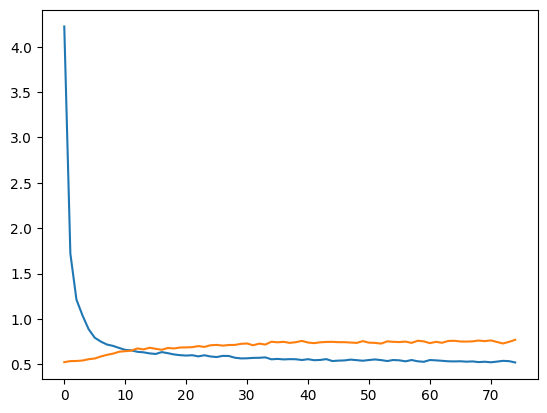

In [8]:
plt.plot(historial.history['loss'])
plt.plot(historial.history['accuracy'])
plt.show()